# Day 6
- Implement a simple CNN model on a certain dataset (maybe CIFAR-10 or anything else) and improve its performance by using ***Regularisation and Optimisation*** techniques.
- Learn some features of different ***callbacks*** and all that kind of stuff to choose good hyperparameters. (and callback for saving weights of model)
- Combine using ***Data Augmentation*** with good ***Optimiser*** and ***Regularisation Techniques***.

In [ ]:
# As always, my Deep Learning Survival Kit😆
import warnings
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

warnings.filterwarnings('ignore')
plt.figure(figsize=(10, 8))
plt.style.use('ggplot')

<Figure size 1000x800 with 0 Axes>

## First, I will try to use different optimisers out of those provided by `tf.keras.optimizers` (AdaGrad, SGD (Momentum, Nesterov), RMSProp and Adam)

### **A couple of tips from Andrej Karpathy:**
> **Adam** is safe. In the early stages of setting baselines I like to use Adam with a learning rate of ***3e-4***. In my experience Adam is much more forgiving to hyperparameters, including a bad learning rate. For *ConvNets* a well-tuned **SGD** will almost always slightly outperform Adam, but the optimal learning rate region is much more narrow and problem-specific. (Note: If you are using *RNNs* and related sequence models it is more common to use Adam.)

**Note**: for RNNs it is also useful to use RMSProp optimiser.

## Let's build the same CNN model again and experiment with different optimizers to see which one performs better under the same conditions.

In [ ]:
# Loading CIFAR-10 dataset first
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]

assert X_train.shape == (50000, 32, 32, 3)
assert X_test.shape == (10000, 32, 32, 3)
assert y_train.shape == (50000, 1)
assert y_test.shape == (10000, 1)

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 13s 0us/step


In [ ]:
X_train_rescaled, X_test_rescaled = X_train.astype(np.float32) / 255, X_test.astype(np.float32) / 255

In [ ]:
# Accuracy and losses comparison plotting function
def plot_accuracy_and_loss_comparison(history, epochs, optimiser=None):
  plt.figure(figsize=(10, 10))
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']

  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs_range = range(epochs)
  plt.figure(figsize=(10, 10))
  plt.subplot(1, 2, 1)
  plt.plot(epochs_range, acc, label='Accuracy')
  plt.plot(epochs_range, val_acc, label='Validation Accuracy')
  plt.legend(loc='lower right')
  plt.title(f'Training and Validation Accuracy (with {optimiser})')

  plt.subplot(1, 2, 2)
  plt.plot(epochs_range, loss, label='Training Loss')
  plt.plot(epochs_range, val_loss, label='Validation Loss')
  plt.legend(loc='upper right')
  plt.title(f'Training and Validation Loss (with {optimiser})')

  plt.show()

In [ ]:
# Images plotting function
def plot_images(img_arr, img_labels):
  fig, axs = plt.subplots(1, 5)
  true_labels = [labels[i[0]] for i in img_labels]
  for img, ax, label in zip(img_arr, axs, true_labels):
    ax.imshow(img)
    ax.set_title(label)
    ax.axis('off')
  plt.show()

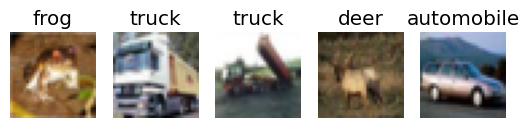

In [ ]:
plot_images(X_train_rescaled[:5], y_train[:5])

In [ ]:
from tensorflow.keras.optimizers import SGD, RMSprop, Adam, Adagrad

In [ ]:
BATCH_SIZE = 32
EPOCHS = 30

In [ ]:
# Build a CNN model (I'll change some layers)
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train_rescaled.shape[1:]),

    tf.keras.layers.Conv2D(15, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(30, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(60, (3, 3), activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

### Simple SGD optimiser:

In [ ]:
# Compile the model
model.compile(optimizer=SGD(learning_rate=3e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history_sgd = model.fit(X_train_rescaled, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test_rescaled, y_test))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.1377 - loss: 2.2777 - val_accuracy: 0.2076 - val_loss: 2.1027
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2059 - loss: 2.1030 - val_accuracy: 0.2644 - val_loss: 1.9982
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 5ms/step - accuracy: 0.2552 - loss: 1.9968 - val_accuracy: 0.3003 - val_loss: 1.8924
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.3041 - loss: 1.8761 - val_accuracy: 0.3579 - val_loss: 1.7967
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3392 - loss: 1.7832 - val_accuracy: 0.3953 - val_loss: 1.6645
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3648 - loss: 1.7164 - val_accuracy: 0.4128 - val_loss: 1.6140
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3878 - loss: 1.6612 - val_accuracy: 0.4085 - val_loss: 1.6507
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.4096 - loss: 1.6077 -

<Figure size 1000x1000 with 0 Axes>

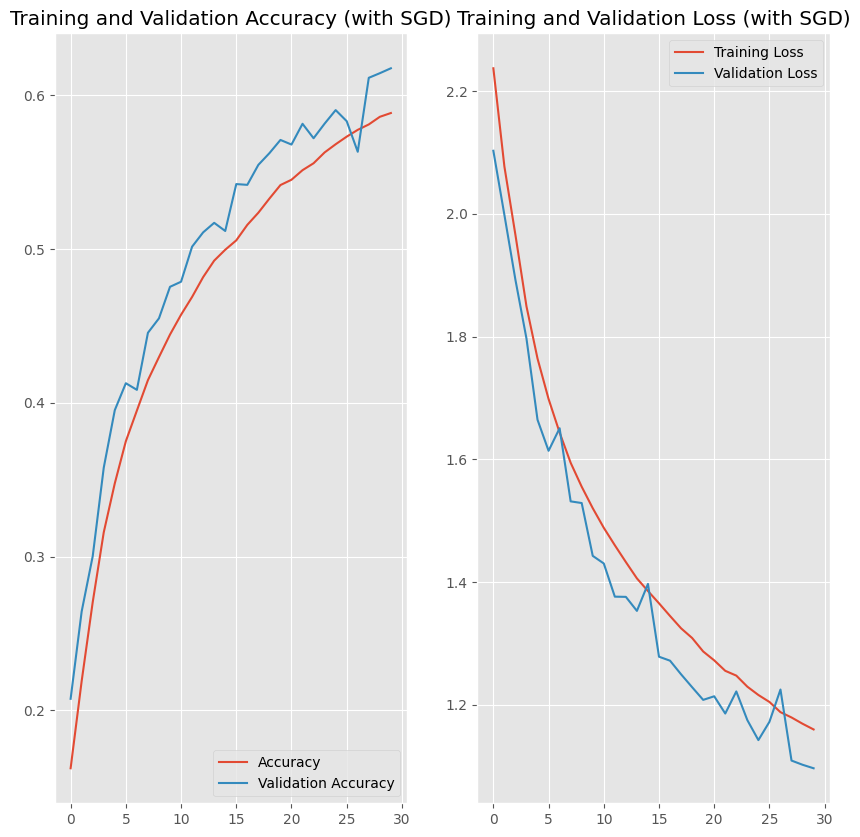

In [ ]:
plot_accuracy_and_loss_comparison(history_sgd, EPOCHS, 'SGD')

### Momentum GD:

In [ ]:
# Compile the model
model.compile(optimizer=SGD(learning_rate=3e-3, momentum=0.9),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history_momentum = model.fit(X_train_rescaled, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test_rescaled, y_test))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.1996 - loss: 2.1094 - val_accuracy: 0.4162 - val_loss: 1.6091
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4191 - loss: 1.5900 - val_accuracy: 0.4973 - val_loss: 1.3904
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4940 - loss: 1.3982 - val_accuracy: 0.5618 - val_loss: 1.2421
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.5411 - loss: 1.2848 - val_accuracy: 0.5628 - val_loss: 1.2204
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.5704 - loss: 1.2102 - val_accuracy: 0.5984 - val_loss: 1.1559
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.5929 - loss: 1.1586 - val_accuracy: 0.6292 - val_loss: 1.0571
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6052 - loss: 1.1129 - val_accuracy: 0.6465 - val_loss: 1.0110
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.6248 - loss: 1.0699

<Figure size 1000x1000 with 0 Axes>

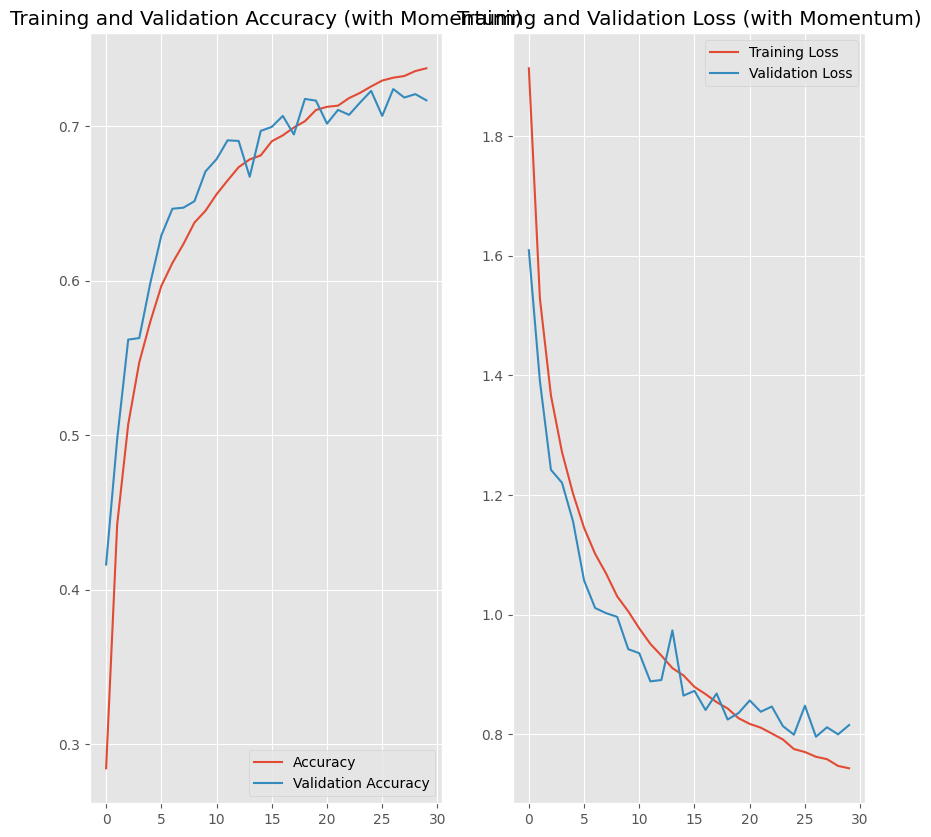

In [ ]:
plot_accuracy_and_loss_comparison(history_momentum, EPOCHS, 'Momentum')

### Nesterov Momentum:

In [ ]:
# Compile the model
model.compile(optimizer=SGD(learning_rate=3e-3, momentum=0.9, nesterov=True),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history_nesterov = model.fit(X_train_rescaled, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test_rescaled, y_test))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.2030 - loss: 2.1129 - val_accuracy: 0.3836 - val_loss: 1.7437
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.4306 - loss: 1.5624 - val_accuracy: 0.5050 - val_loss: 1.3666
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4946 - loss: 1.3962 - val_accuracy: 0.5432 - val_loss: 1.2795
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5441 - loss: 1.2814 - val_accuracy: 0.5844 - val_loss: 1.1714
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5736 - loss: 1.2079 - val_accuracy: 0.6028 - val_loss: 1.1260
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5892 - loss: 1.1560 - val_accuracy: 0.6311 - val_loss: 1.0584
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6149 - loss: 1.0852 - val_accuracy: 0.6349 - val_loss: 1.0336
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6304 - loss: 1.0480 

<Figure size 1000x1000 with 0 Axes>

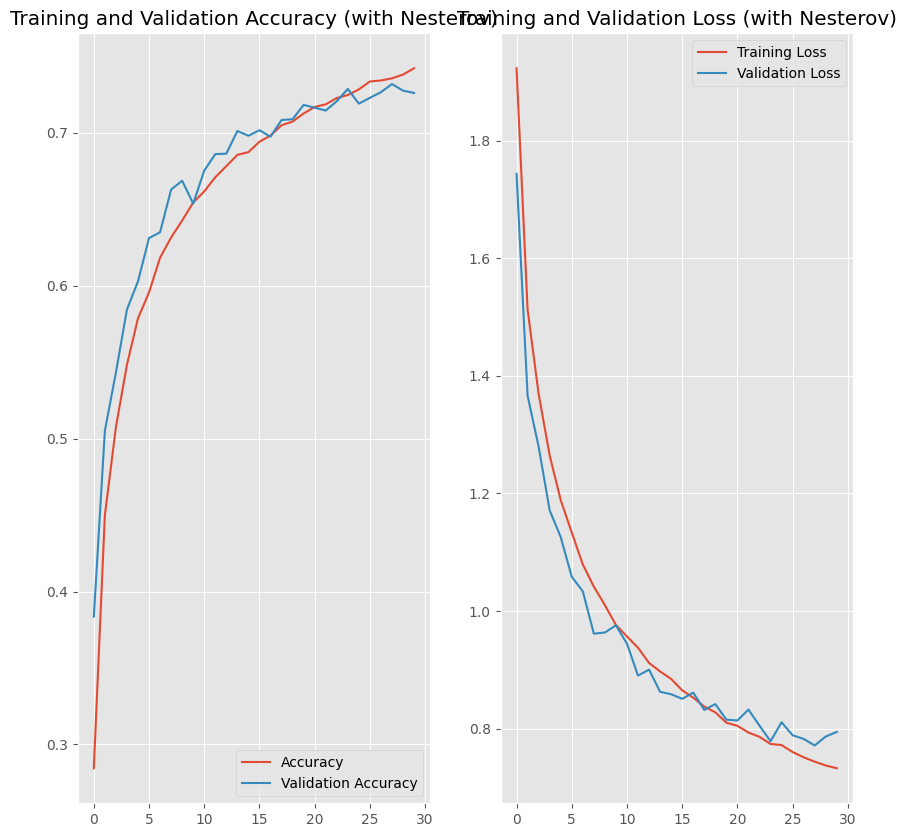

In [ ]:
plot_accuracy_and_loss_comparison(history_nesterov, EPOCHS, 'Nesterov')

### AdaGrad:

In [ ]:
# Compile the model
model.compile(optimizer=Adagrad(learning_rate=3e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history_adagrad = model.fit(X_train_rescaled, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test_rescaled, y_test))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.1397 - loss: 2.2694 - val_accuracy: 0.2524 - val_loss: 2.0128
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2499 - loss: 2.0030 - val_accuracy: 0.3341 - val_loss: 1.8316
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3167 - loss: 1.8403 - val_accuracy: 0.3792 - val_loss: 1.7345
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3514 - loss: 1.7539 - val_accuracy: 0.3946 - val_loss: 1.6639
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3716 - loss: 1.6970 - val_accuracy: 0.4116 - val_loss: 1.6280
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.3906 - loss: 1.6521 - val_accuracy: 0.4231 - val_loss: 1.5799
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.3987 - loss: 1.6190 - val_accuracy: 0.4316 - val_loss: 1.5553
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4165 - loss: 1.5876 -

<Figure size 1000x1000 with 0 Axes>

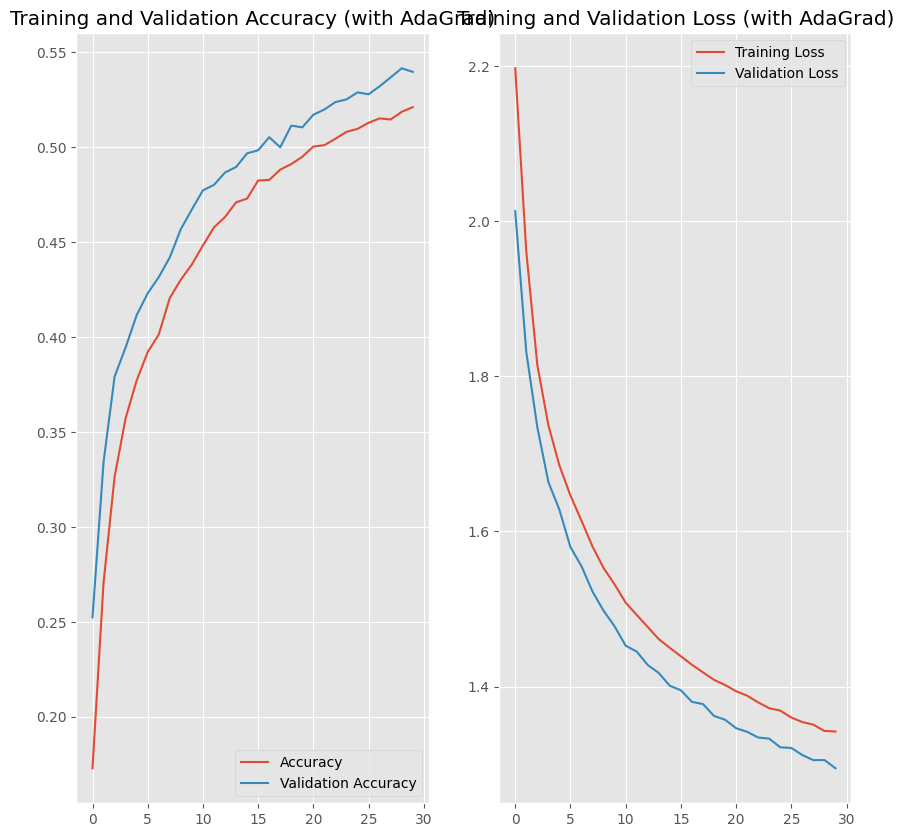

In [ ]:
plot_accuracy_and_loss_comparison(history_adagrad, EPOCHS, 'AdaGrad')

### RMSProp:

In [ ]:
# Compile the model
model.compile(optimizer=RMSprop(learning_rate=3e-3),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history_rmsprop = model.fit(X_train_rescaled, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test_rescaled, y_test))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.3021 - loss: 1.8957 - val_accuracy: 0.4979 - val_loss: 1.3630
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4879 - loss: 1.4400 - val_accuracy: 0.4971 - val_loss: 1.4017
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5263 - loss: 1.3461 - val_accuracy: 0.5640 - val_loss: 1.2621
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5477 - loss: 1.2959 - val_accuracy: 0.5985 - val_loss: 1.1530
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5578 - loss: 1.2837 - val_accuracy: 0.5963 - val_loss: 1.1452
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5609 - loss: 1.2731 - val_accuracy: 0.5398 - val_loss: 1.2975
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5685 - loss: 1.2650 - val_accuracy: 0.5905 - val_loss: 1.1844
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5694 - loss: 1.2620 -

<Figure size 1000x1000 with 0 Axes>

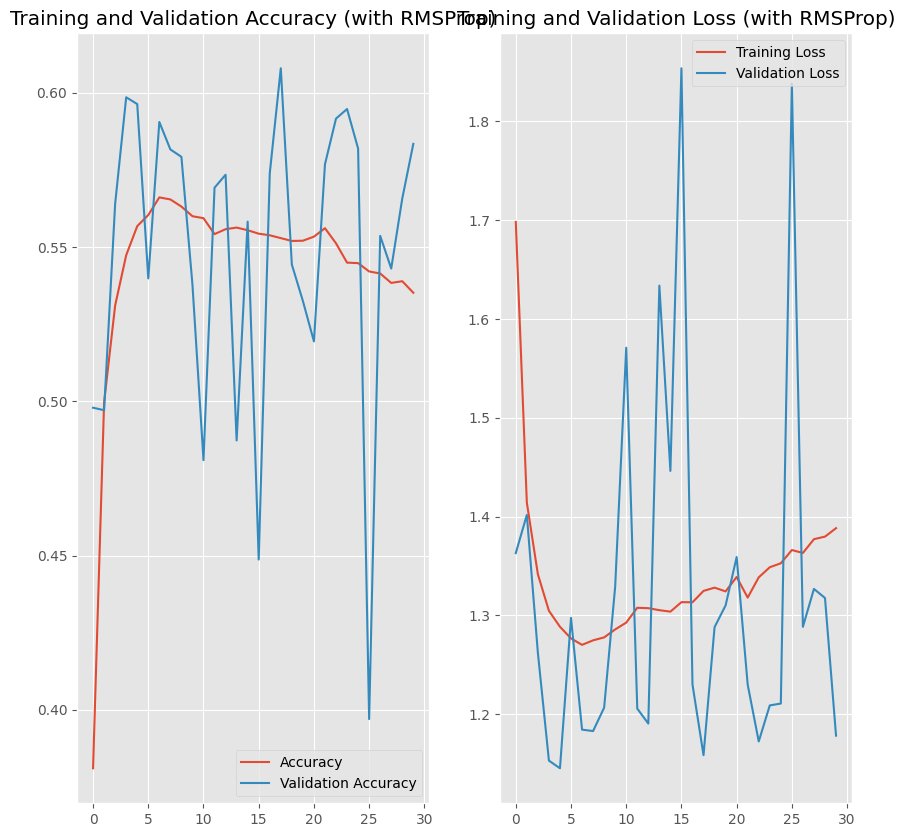

In [ ]:
plot_accuracy_and_loss_comparison(history_rmsprop, EPOCHS, 'RMSProp')

### Adam:

In [ ]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=3e-4),  # here I'll try Andrej's suggestion on lr value for Adam
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model
history_adam = model.fit(X_train_rescaled, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test_rescaled, y_test))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 16s 8ms/step - accuracy: 0.2684 - loss: 1.9568 - val_accuracy: 0.4677 - val_loss: 1.4731
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.4627 - loss: 1.4811 - val_accuracy: 0.5222 - val_loss: 1.3205
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5042 - loss: 1.3718 - val_accuracy: 0.5603 - val_loss: 1.2411
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5380 - loss: 1.2992 - val_accuracy: 0.5763 - val_loss: 1.1843
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5648 - loss: 1.2275 - val_accuracy: 0.5972 - val_loss: 1.1430
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5836 - loss: 1.1827 - val_accuracy: 0.6084 - val_loss: 1.1051
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5967 - loss: 1.1493 - val_accuracy: 0.6215 - val_loss: 1.0722
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6045 - loss: 1.1201 

<Figure size 1000x1000 with 0 Axes>

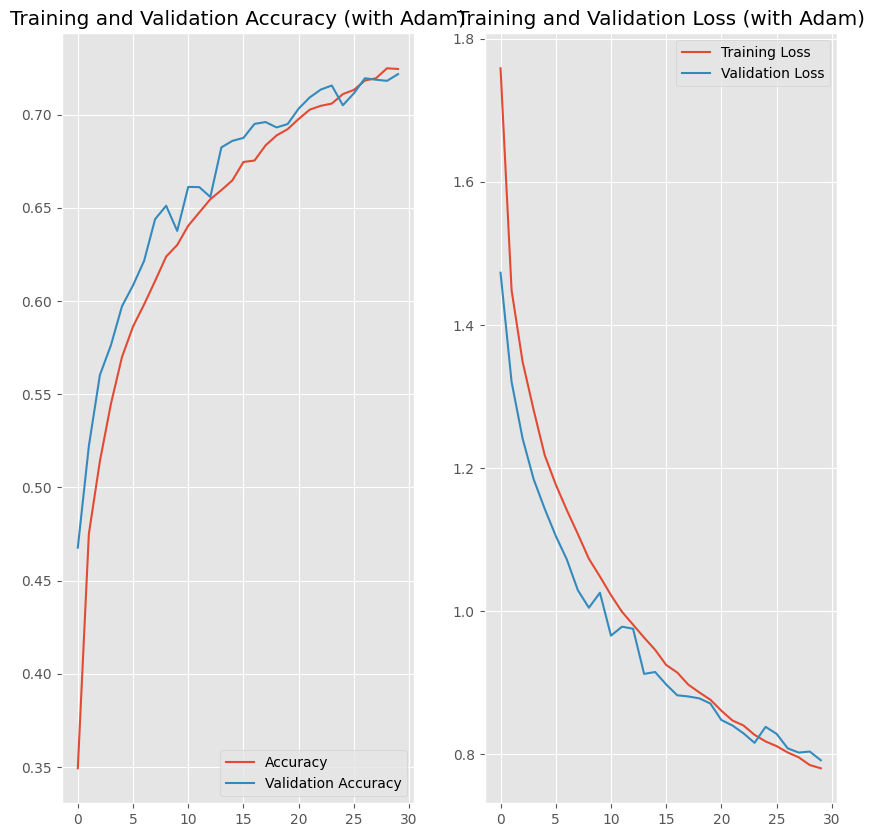

In [ ]:
plot_accuracy_and_loss_comparison(history_adam, EPOCHS, 'Adam')

## **Conclusion**: ***Nesterov Momentum*** is the **winner** (to be honest, I’m quite surprised by its performance — it’s even better than Adam). However, ***Adam*** performed almost as well as Nesterov. On the other hand, ***RMSProp*** had the ***worst*** performance I’ve ever seen, fluctuating significantly and failing to reach even 61% accuracy.

## **Regularisation Techniques**
When a neural network ***overfits*** on the training dataset, it learns an overly complex representation that models the training dataset too well. As a result, it performs exceptionally well on the training dataset but generalizes poorly to unseen test data.

**Regularization techniques** help improve a neural network’s generalization ability by **reducing overfitting**. They do this by ***minimizing needless complexity*** and exposing the network to more diverse data.

### Here are the **key regularisation techniques**:


* **L1(Lasso: $L_{\text{new}} = L + \lambda \sum |w|$) and L2(Ridge: $L_{\text{new}} = L + \lambda \sum w^2$) Regularization** (Weight Decay)
* **Elastic Net Regularization** (the combination of L1 and L2 Regularisations) ($L_{\text{new}} = L + \lambda_1 \sum |w| + \lambda_2 \sum w^2$)
* **Early Stopping**
* **Dropout** (this prevents the network from relying too heavily on any particular neurons)
* **Batch Normalisation** (by normalizing the activations within each mini-batch, it reduces the model's sensitivity to weight initialization and internal covariate shift, thereby reducing overfitting to some extent)
* **Data Augmentation** (we have seen already)
* **Spatial Dropout** (is applied to feature maps in CNNs)

### When to Use:
- L2 Regularization is commonly used in almost all neural networks, including CNNs.
- Dropout is used in fully connected layers, often in deeper CNN architectures.
- Data augmentation is specific to image datasets and is common in CNNs.
- Early stopping works well when overfitting is detected via validation metrics.
  

**References**:
- Goodfellow, I., Bengio, Y., & Courville, A. (2016). *Deep Learning*. MIT Press.
- Chollet, F. (2017). *Deep Learning with Python*.

### Here I'll try to use different Regularisation Techniques and use Nesterov Momentum Optimiser and compare the accuracy between the models.

## Dropout

In [ ]:
# Build a CNN model with only using Dropout Technique
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train_rescaled.shape[1:]),

    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.Dropout(0.5),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=3e-3, momentum=0.9, nesterov=True),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Fit the model
history_dropout = model.fit(X_train_rescaled, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test_rescaled, y_test))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 17s 8ms/step - accuracy: 0.1941 - loss: 2.1236 - val_accuracy: 0.3932 - val_loss: 1.6844
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 3ms/step - accuracy: 0.4031 - loss: 1.6133 - val_accuracy: 0.5054 - val_loss: 1.3647
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4875 - loss: 1.4153 - val_accuracy: 0.5545 - val_loss: 1.2414
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5270 - loss: 1.3046 - val_accuracy: 0.5905 - val_loss: 1.1473
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5565 - loss: 1.2301 - val_accuracy: 0.6094 - val_loss: 1.0962
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5810 - loss: 1.1687 - val_accuracy: 0.6302 - val_loss: 1.0458
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6069 - loss: 1.1155 - val_accuracy: 0.6504 - val_loss: 1.0096
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.6110 - loss: 1.0969 -

<Figure size 1000x1000 with 0 Axes>

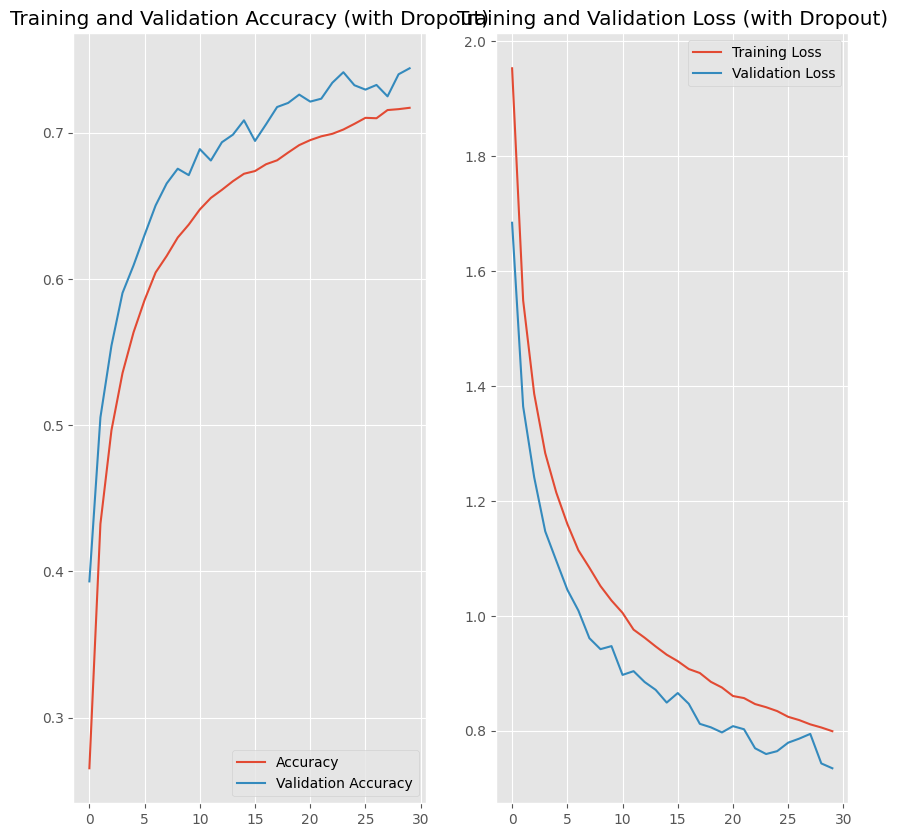

In [ ]:
plot_accuracy_and_loss_comparison(history_dropout, EPOCHS, "Dropout")

## L2 Regularisation

In [ ]:
# Build a CNN model with only using Dropout Technique
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train_rescaled.shape[1:]),

    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-2)),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-2)),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-3)),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(1e-2)),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=3e-3, momentum=0.9, nesterov=True),
              loss=tf.keras.losses.SparseCategoricalCrossentropy,
              metrics=['accuracy'])

In [ ]:
# Fit the model
history_l2 = model.fit(X_train_rescaled, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test_rescaled, y_test))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.2334 - loss: 3.1346 - val_accuracy: 0.4268 - val_loss: 1.9934
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.4503 - loss: 1.8396 - val_accuracy: 0.4741 - val_loss: 1.6929
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5023 - loss: 1.6113 - val_accuracy: 0.5384 - val_loss: 1.5113
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5410 - loss: 1.5203 - val_accuracy: 0.5570 - val_loss: 1.4589
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.5630 - loss: 1.4728 - val_accuracy: 0.5445 - val_loss: 1.5290
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5790 - loss: 1.4392 - val_accuracy: 0.5818 - val_loss: 1.4169
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.5922 - loss: 1.4081 - val_accuracy: 0.5817 - val_loss: 1.4314
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6057 - loss: 1.3859 - 

<Figure size 1000x1000 with 0 Axes>

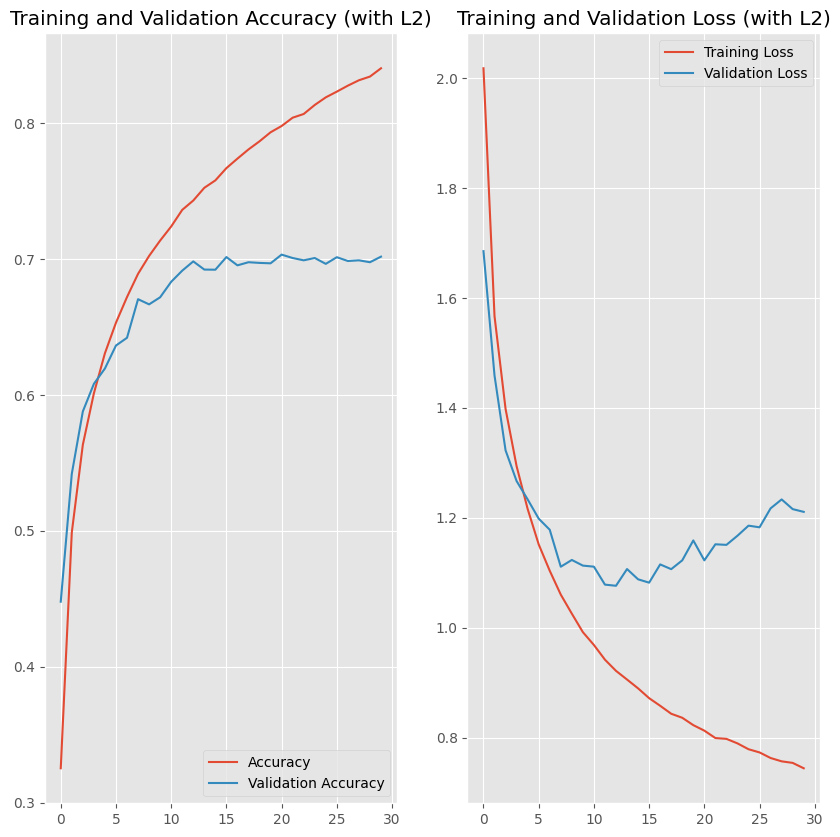

In [ ]:
plot_accuracy_and_loss_comparison(history_l2, EPOCHS, "L2")

## **Batch Normalisation**
This regularisation techniques is used to address the problem called ***internal covariate shift***, which is desrcibed by the changing distribution of the each layers' inputs during the training process, as the parameters of the previous layers change.
> Our method draws its strength from making normalization a part of the model architecture and **performing the normalization for each training mini-batch**. Batch Normalization allows us to use much higher learning rates and be less careful about initialization. It also acts as a regularizer, in some cases eliminating the need for Dropout.

(*Ioffe, S., & Szegedy, C. (2015). Batch Normalization: Accelerating Deep Network Training by Reducing Internal Covariate Shift.*)

> Batch normalization normalizes the inputs of each layer across the batch, which stabilizes learning but also introduces variability during training, especially for small batch sizes. Since the normalization is based on the statistics (mean and variance) of each mini-batch, these statistics ***can fluctuate*** from batch to batch, leading to oscillations in validation accuracy.

(*ChatGPT*)

In [ ]:
# Build a CNN model with only using Batch Normalisation
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train_rescaled.shape[1:]),

    tf.keras.layers.Conv2D(16, (3, 3)),
    tf.keras.layers.BatchNormalization(momentum=0.9),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.BatchNormalization(momentum=0.9),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.BatchNormalization(momentum=0.9),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(momentum=0.9),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model (we'll increase the value of learning rate, according to the research paper)
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=5e-3, momentum=0.9, nesterov=True),
              loss=tf.keras.losses.SparseCategoricalCrossentropy,
              metrics=['accuracy'])

In [ ]:
# Fit the model
history_bn = model.fit(X_train_rescaled, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test_rescaled, y_test))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.4141 - loss: 1.6246 - val_accuracy: 0.5198 - val_loss: 1.3106
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 15s 4ms/step - accuracy: 0.5949 - loss: 1.1447 - val_accuracy: 0.6269 - val_loss: 1.0672
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6417 - loss: 1.0128 - val_accuracy: 0.6729 - val_loss: 0.9248
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.6751 - loss: 0.9215 - val_accuracy: 0.7068 - val_loss: 0.8382
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6971 - loss: 0.8646 - val_accuracy: 0.7133 - val_loss: 0.8236
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.7184 - loss: 0.8143 - val_accuracy: 0.6696 - val_loss: 0.9449
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 4ms/step - accuracy: 0.7348 - loss: 0.7628 - val_accuracy: 0.7157 - val_loss: 0.8177
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7463 - loss: 0.7

<Figure size 1000x1000 with 0 Axes>

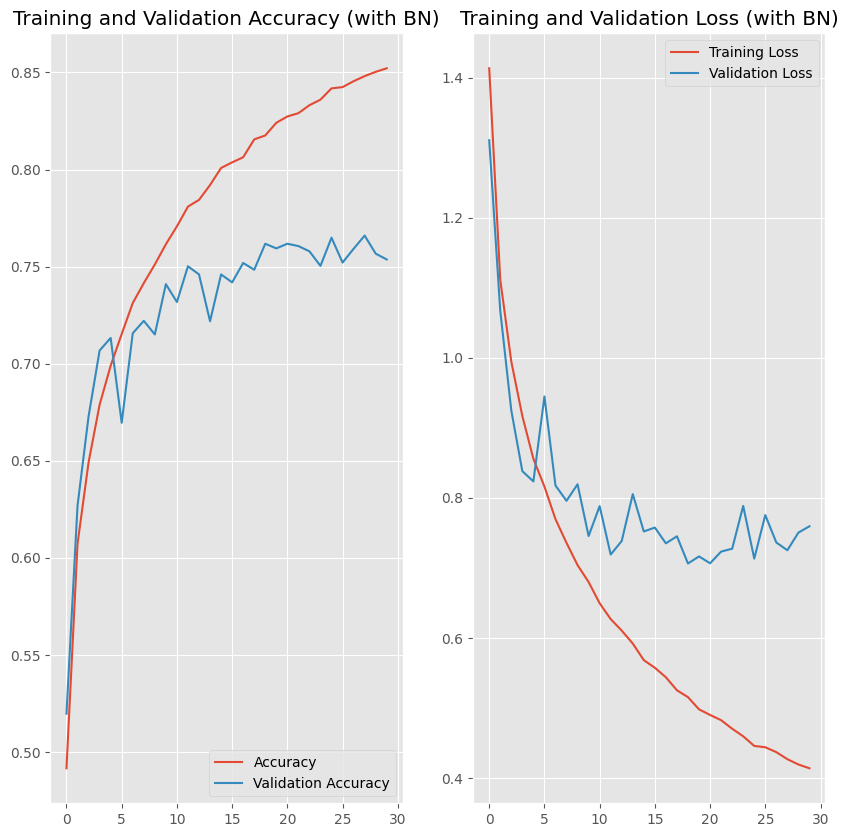

In [ ]:
plot_accuracy_and_loss_comparison(history_bn, EPOCHS, 'BN')

## Batch Normalisation along with L2

In [ ]:
# Build a CNN model using Batch Normalisation and L2 Regularisation
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train_rescaled.shape[1:]),

    tf.keras.layers.Conv2D(16, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(1e-3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(1e-3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(1e-3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, kernel_regularizer=tf.keras.regularizers.l2(1e-3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=3e-3, momentum=0.9, nesterov=True),
              loss=tf.keras.losses.SparseCategoricalCrossentropy,
              metrics=['accuracy'])

In [ ]:
# Fit the model
history_bn_l2 = model.fit(X_train_rescaled, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test_rescaled, y_test))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 18s 9ms/step - accuracy: 0.4267 - loss: 1.8055 - val_accuracy: 0.5329 - val_loss: 1.4899
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.6166 - loss: 1.2659 - val_accuracy: 0.6204 - val_loss: 1.2385
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.6750 - loss: 1.0958 - val_accuracy: 0.5885 - val_loss: 1.3650
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7073 - loss: 1.0007 - val_accuracy: 0.5461 - val_loss: 1.4849
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7271 - loss: 0.9375 - val_accuracy: 0.6903 - val_loss: 1.0553
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7427 - loss: 0.8862 - val_accuracy: 0.5731 - val_loss: 1.4577
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7570 - loss: 0.8522 - val_accuracy: 0.6459 - val_loss: 1.2046
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.7718 - loss: 0.8126 

<Figure size 1000x1000 with 0 Axes>

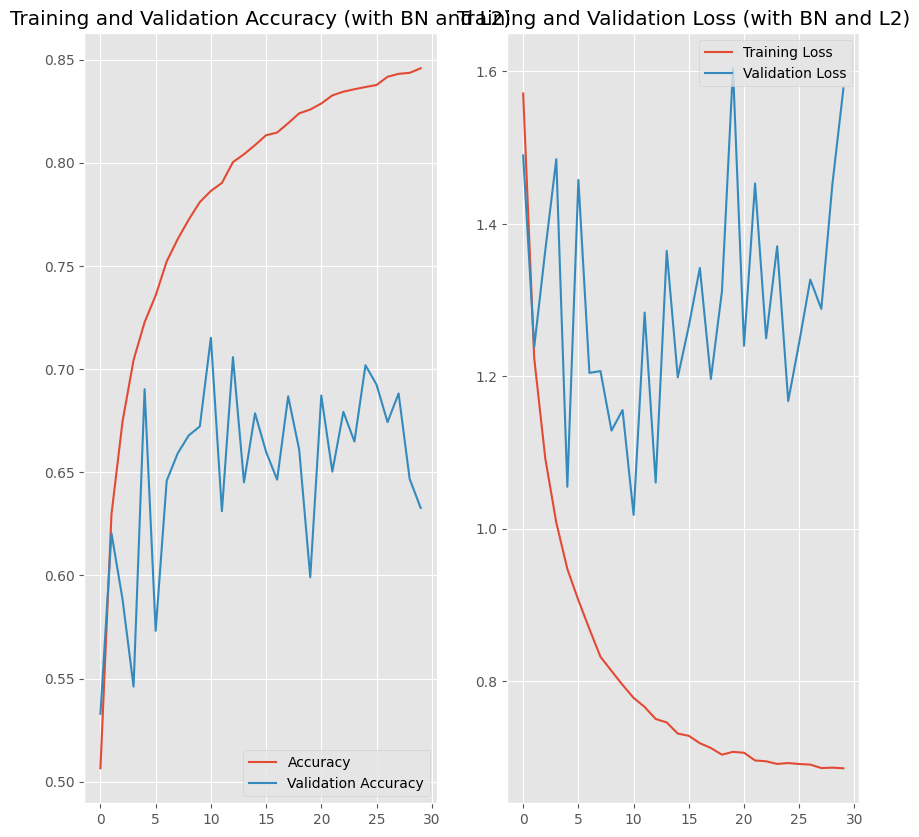

In [ ]:
plot_accuracy_and_loss_comparison(history_bn_l2, EPOCHS, 'BN and L2')

## Batch Normalisation along with Dropout

In [ ]:
# Build a CNN model
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train_rescaled.shape[1:]),

    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dropout(0.4),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=3e-3, momentum=0.9, nesterov=True),
              loss=tf.keras.losses.SparseCategoricalCrossentropy,
              metrics=['accuracy'])

In [ ]:
# Fit the model
history_bn_do = model.fit(X_train_rescaled, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS, validation_data=(X_test_rescaled, y_test))

Epoch 1/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.3278 - loss: 1.8327 - val_accuracy: 0.4648 - val_loss: 1.4897
Epoch 2/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4910 - loss: 1.4032 - val_accuracy: 0.4939 - val_loss: 1.4035
Epoch 3/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.5427 - loss: 1.2830 - val_accuracy: 0.4982 - val_loss: 1.4424
Epoch 4/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5754 - loss: 1.1892 - val_accuracy: 0.5994 - val_loss: 1.1393
Epoch 5/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5967 - loss: 1.1408 - val_accuracy: 0.6313 - val_loss: 1.0413
Epoch 6/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6120 - loss: 1.0963 - val_accuracy: 0.6447 - val_loss: 1.0075
Epoch 7/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6287 - loss: 1.0526 - val_accuracy: 0.6436 - val_loss: 1.0193
Epoch 8/30
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6423 - loss: 1.0149 -

<Figure size 1000x1000 with 0 Axes>

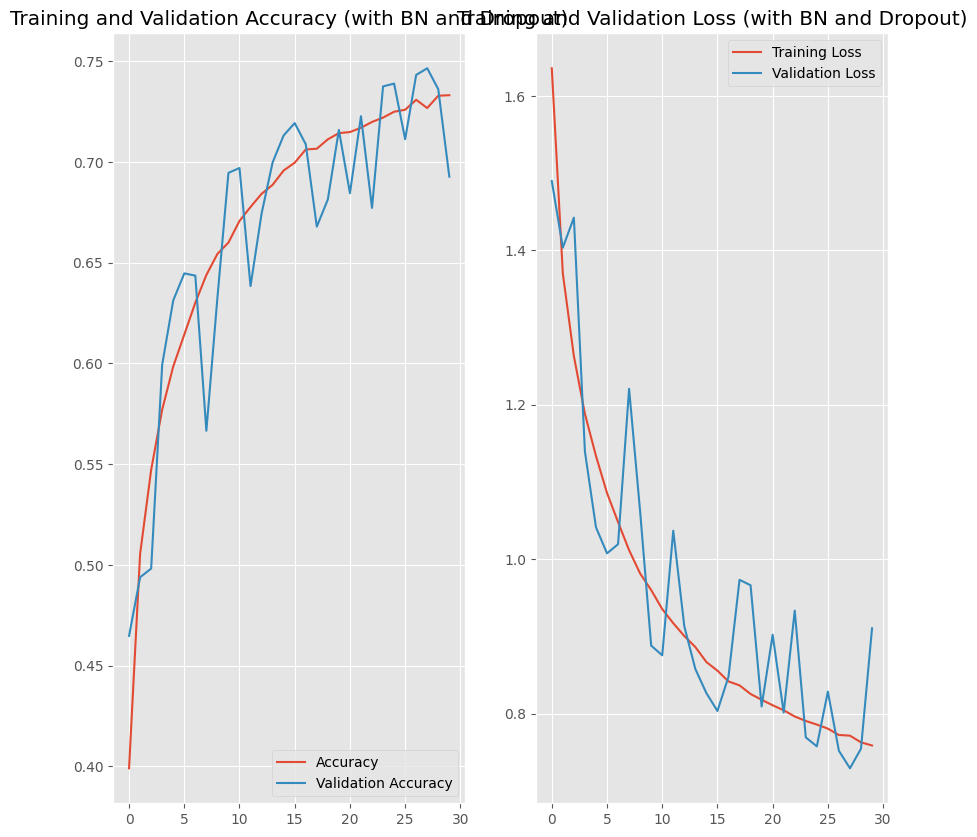

In [ ]:
plot_accuracy_and_loss_comparison(history_bn_do, EPOCHS, "BN and Dropout")

## **Conclusion**: I really love how the model with added ***Dropout*** layers performed at the beginning, it reached **74.42%** of accuracy. However, the model with ***Batch normalisation*** layers (and also one small Dropout layer) outperformed our first model a wee bit and reached **76.6%** of accuracy, but the training process fluctuated a bit (but, I mean, with Batch Normalisation it's pretty reasonable, the explanation is in the Batch Normalisation "section").

### *Next, I'll to try to use the model with Dropout+BN layers and Nesterov optimiser with Data Augmentation, to see whether it will have better performance.*

## Using `imgaug` for Data Augmentation with our best performing model

In [ ]:
import imgaug.augmenters as iaa
import numpy as np

In [ ]:
seq = iaa.Sequential([
    iaa.Fliplr(0.5),  # horizontal flip with 50% of probability
    iaa.Sometimes(
        0.6,
        iaa.Affine(rotate=(-20, 20),  # random rotation between -20 and 20 degrees
                   scale=(0.9, 1.2))   # random scaling between 90% (zoom out) and 120% (zoom in)
    ),
    iaa.Sometimes(
        0.5,
        iaa.Multiply((0.8, 1.2)),  # random brightness (slightly darker or brighter (80% to 120%))
    ),
    iaa.Sometimes(
        0.6,
        iaa.AdditiveGaussianNoise(scale=(0, 5e-2))  # if your dataset is in the range [0, 1], then use this example (it adds noise up to 0.05 (you can adjust this value as well)),
        # but if your dataset is in range [0, 255], then use (0, 0.05 * 255)
    ),
    iaa.Sometimes(
        0.5,
        iaa.Crop(percent=(0, 0.1))  # randomly crop between 0% to 10% of the image on each side
    )
])

In [ ]:
seq2 = iaa.Sequential([
    iaa.Fliplr(0.75),  # horizontal flip with 50% of probability
    iaa.Sometimes(
        0.75,
        iaa.Affine(rotate=(-20, 20),  # random rotation between -20 and 20 degrees
                   scale=(0.9, 1.2))   # random scaling between 90% (zoom out) and 120% (zoom in)
    ),
    iaa.Sometimes(
        0.6,
        iaa.Multiply((0.8, 1.2)),  # random brightness (slightly darker or brighter (80% to 120%))
    ),
    iaa.Sometimes(
        0.25,
        iaa.AdditiveGaussianNoise(scale=(0, 5e-2))  # if your dataset is in the range [0, 1], then use this example (it adds noise up to 0.05 (you can adjust this value as well)),
        # but if your dataset is in range [0, 255], then use (0, 0.05 * 255)
    ),
    iaa.Sometimes(
        0.5,
        iaa.Crop(percent=(0, 0.1))  # randomly crop between 0% to 10% of the image on each side
    )
])

In [ ]:
# Defining a custom data generator
def imgaug_data_generator(X, y, batch_size=BATCH_SIZE, seq=seq):
  while True:
    # Shuffle the dataset at the start of each epoch and select a batch of images
    indices = np.random.randint(low=0, high=len(X), size=batch_size)

    X_batch = X[indices]
    y_batch = y[indices]

    X_batch_aug = seq(images=X_batch)  # Applying data augmentation

    yield X_batch_aug, y_batch

In [ ]:
# I will create the same model that achieved the highest performance (with BN and Dropout layers)
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=X_train_rescaled.shape[1:]),

    tf.keras.layers.Conv2D(16, (3, 3)),
    tf.keras.layers.BatchNormalization(momentum=0.9),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(32, (3, 3)),
    tf.keras.layers.BatchNormalization(momentum=0.9),
    tf.keras.layers.Activation('relu'),

    tf.keras.layers.Conv2D(64, (3, 3)),
    tf.keras.layers.BatchNormalization(momentum=0.9),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Dropout(0.25),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64),
    tf.keras.layers.BatchNormalization(momentum=0.9),
    tf.keras.layers.Activation('relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

In [ ]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=5e-3, momentum=0.9, nesterov=True),
              loss=tf.keras.losses.SparseCategoricalCrossentropy,
              metrics=['accuracy'])

In [ ]:
# Fit the model
history_bn = model.fit(imgaug_data_generator(X_train_rescaled, y_train),
                       epochs=EPOCHS,
                       steps_per_epoch=len(X_train_rescaled) // 32,
                       validation_data=(X_test_rescaled, y_test))

Epoch 1/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 67s 39ms/step - accuracy: 0.3769 - loss: 1.7144 - val_accuracy: 0.5627 - val_loss: 1.2265
Epoch 2/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.5295 - loss: 1.3336 - val_accuracy: 0.6056 - val_loss: 1.0998
Epoch 3/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.5635 - loss: 1.2266 - val_accuracy: 0.6323 - val_loss: 1.0244
Epoch 4/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.5817 - loss: 1.1729 - val_accuracy: 0.6198 - val_loss: 1.0486
Epoch 5/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 50s 32ms/step - accuracy: 0.6040 - loss: 1.1314 - val_accuracy: 0.6509 - val_loss: 0.9878
Epoch 6/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.6231 - loss: 1.0813 - val_accuracy: 0.6686 - val_loss: 0.9366
Epoch 7/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.6374 - loss: 1.0447 - val_accuracy: 0.7000 - val_loss: 0.8736
Epoch 8/30
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.6371 -

Let's train our model for additional 20 epochs:

In [ ]:
model.fit(imgaug_data_generator(X_train_rescaled, y_train),
          epochs=20,
          steps_per_epoch=len(X_train_rescaled) // 32,
          validation_data=(X_test_rescaled, y_test))

Epoch 1/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 51s 33ms/step - accuracy: 0.7257 - loss: 0.7909 - val_accuracy: 0.7639 - val_loss: 0.6773
Epoch 2/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.7218 - loss: 0.7916 - val_accuracy: 0.7637 - val_loss: 0.6891
Epoch 3/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 55s 35ms/step - accuracy: 0.7202 - loss: 0.7950 - val_accuracy: 0.7697 - val_loss: 0.6607
Epoch 4/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 65s 41ms/step - accuracy: 0.7290 - loss: 0.7869 - val_accuracy: 0.7669 - val_loss: 0.6854
Epoch 5/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7264 - loss: 0.7842 - val_accuracy: 0.7736 - val_loss: 0.6601
Epoch 6/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 53s 34ms/step - accuracy: 0.7309 - loss: 0.7781 - val_accuracy: 0.7703 - val_loss: 0.6571
Epoch 7/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 48s 30ms/step - accuracy: 0.7325 - loss: 0.7637 - val_accuracy: 0.7708 - val_loss: 0.6615
Epoch 8/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 44s 28ms/step - accuracy: 0.7311 -

<Figure size 1000x1000 with 0 Axes>

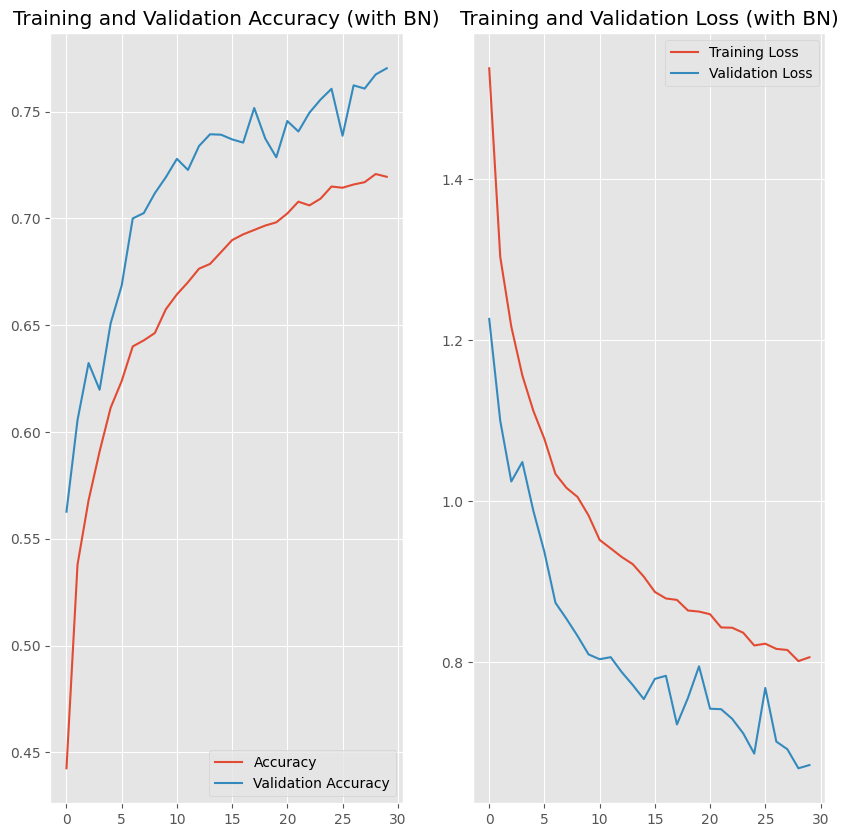

In [ ]:
plot_accuracy_and_loss_comparison(history_bn, EPOCHS, "BN")

## Model Evaluation

In [ ]:
evaluation = model.evaluate(X_test_rescaled, y_test)
print(f'Test Accuracy : {evaluation[1] * 100:.2f}%')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.7854 - loss: 0.6322
Test Accuracy : 78.43%


313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


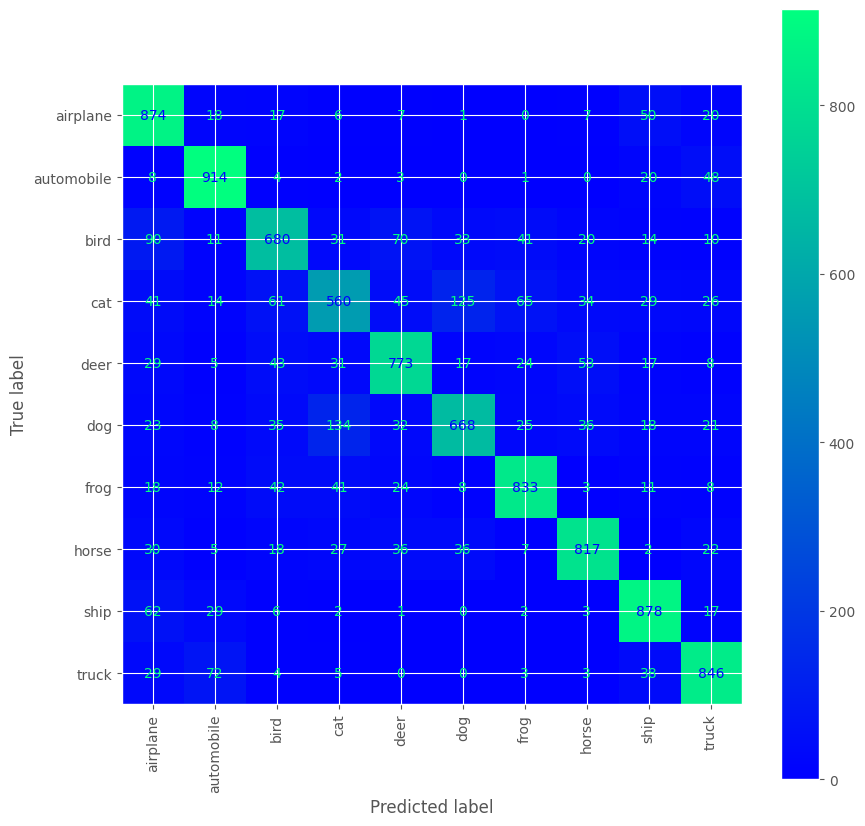

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_rescaled)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='winter')

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.87      0.79      1000
           1       0.84      0.91      0.88      1000
           2       0.75      0.68      0.71      1000
           3       0.67      0.56      0.61      1000
           4       0.78      0.77      0.78      1000
           5       0.75      0.67      0.71      1000
           6       0.83      0.83      0.83      1000
           7       0.84      0.82      0.83      1000
           8       0.82      0.88      0.85      1000
           9       0.82      0.85      0.84      1000

    accuracy                           0.78     10000
   macro avg       0.78      0.78      0.78     10000
weighted avg       0.78      0.78      0.78     10000



### Let's train our model for another 20 epochs adjusting our augmentation pipeline a little bit:


In [ ]:
model.fit(imgaug_data_generator(X_train_rescaled, y_train, seq=seq2),
          epochs=20,
          steps_per_epoch=len(X_train_rescaled) // 32,
          validation_data=(X_test_rescaled, y_test))

Epoch 1/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 52s 33ms/step - accuracy: 0.7395 - loss: 0.7442 - val_accuracy: 0.7827 - val_loss: 0.6378
Epoch 2/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 46s 29ms/step - accuracy: 0.7395 - loss: 0.7517 - val_accuracy: 0.7795 - val_loss: 0.6391
Epoch 3/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 47s 30ms/step - accuracy: 0.7421 - loss: 0.7437 - val_accuracy: 0.7861 - val_loss: 0.6171
Epoch 4/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.7432 - loss: 0.7349 - val_accuracy: 0.7712 - val_loss: 0.6688
Epoch 5/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.7449 - loss: 0.7381 - val_accuracy: 0.7855 - val_loss: 0.6232
Epoch 6/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.7478 - loss: 0.7233 - val_accuracy: 0.7770 - val_loss: 0.6511
Epoch 7/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 45s 29ms/step - accuracy: 0.7530 - loss: 0.7104 - val_accuracy: 0.7824 - val_loss: 0.6359
Epoch 8/20
1562/1562 ━━━━━━━━━━━━━━━━━━━━ 46s 30ms/step - accuracy: 0.7475 -

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


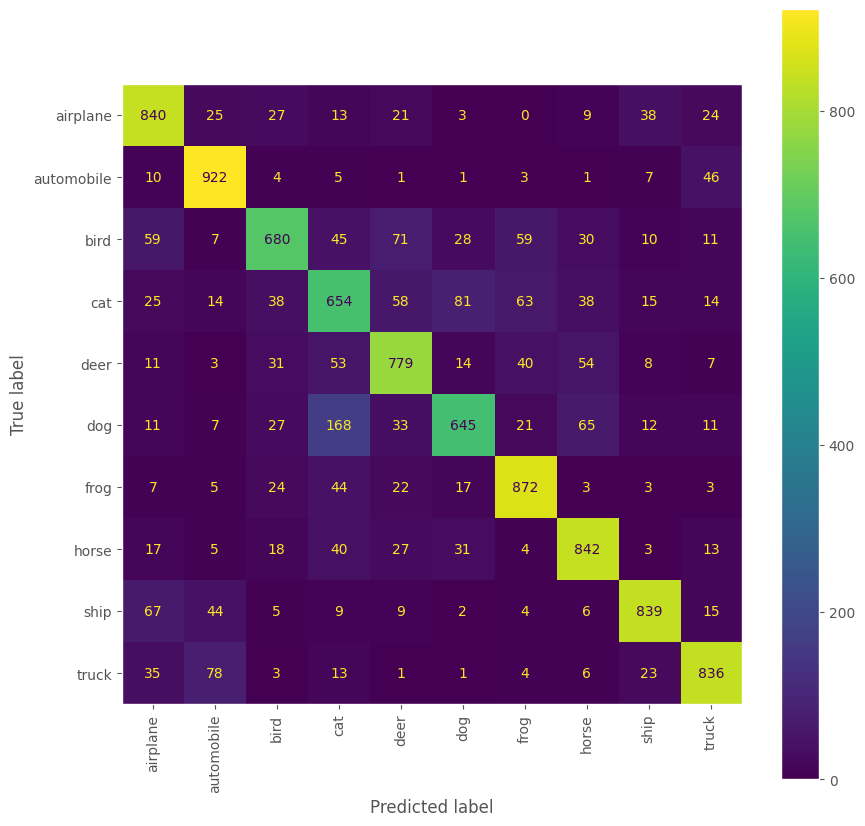

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test_rescaled)
y_pred = np.argmax(y_pred, axis=1)
cm = confusion_matrix(y_test, y_pred)


disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=labels)


# NOTE: Fill all variables here with default values of the plot_confusion_matrix
fig, ax = plt.subplots(figsize=(10, 10))
disp = disp.plot(xticks_rotation='vertical', ax=ax, cmap='viridis')
plt.grid(False)

plt.show()

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81      1000
           1       0.83      0.92      0.87      1000
           2       0.79      0.68      0.73      1000
           3       0.63      0.65      0.64      1000
           4       0.76      0.78      0.77      1000
           5       0.78      0.65      0.71      1000
           6       0.81      0.87      0.84      1000
           7       0.80      0.84      0.82      1000
           8       0.88      0.84      0.86      1000
           9       0.85      0.84      0.84      1000

    accuracy                           0.79     10000
   macro avg       0.79      0.79      0.79     10000
weighted avg       0.79      0.79      0.79     10000

